In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

raisin = pd.read_csv("C:\AI_HW/Raisin_Dataset.csv")

raisin

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
#Splitting the data into training and test test
X = raisin.iloc[:,0:7].values
y = raisin.iloc[:,7].values

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [6]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [8]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 44)                352       
                                                                 
 dense_5 (Dense)             (None, 20)                900       
                                                                 
 dense_6 (Dense)             (None, 16)                336       
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,622
Trainable params: 1,622
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 1.6286 - accuracy: 0.8222 - val_loss: 3.2399 - val_accuracy: 0.7222
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 1.5302 - accuracy: 0.8097 - val_loss: 1.3720 - val_accuracy: 0.8333
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 1.1910 - accuracy: 0.8236 - val_loss: 2.9775 - val_accuracy: 0.7333
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 1.7691 - accuracy: 0.8014 - val_loss: 1.3911 - val_accuracy: 0.8611
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 3.2539 - accuracy: 0.7139 - val_loss: 3.1458 - val_accuracy: 0.8278
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 2.0313 - accuracy: 0.7917 - val_loss: 1.9186 - val_accuracy: 0.8111
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 1.4756 - accuracy: 0.8319 - val_loss: 4.3048 - val_accuracy: 0.7833
Epoch 8/100
2

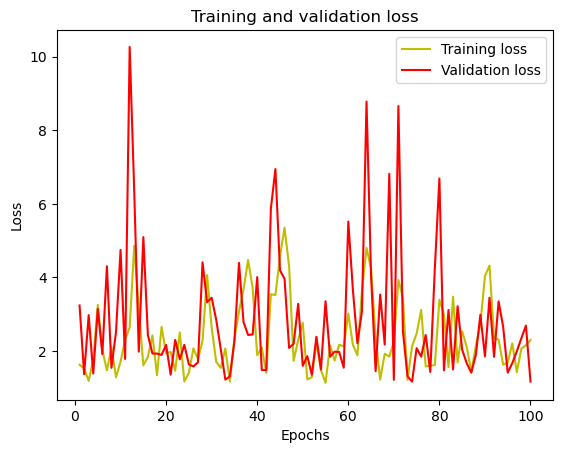

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

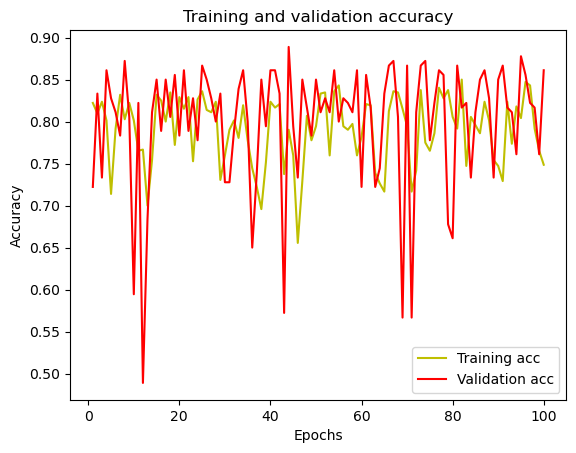

In [16]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        97
           1       0.86      0.81      0.83        83

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

[[86 11]
 [16 67]]
